<a href="https://colab.research.google.com/github/jatinaswal/python_projects/blob/main/diwali_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

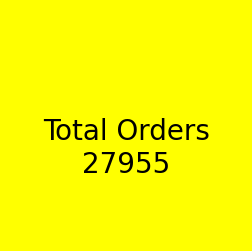

-----------------------------------------------------------------------


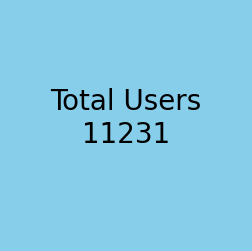

-----------------------------------------------------------------------


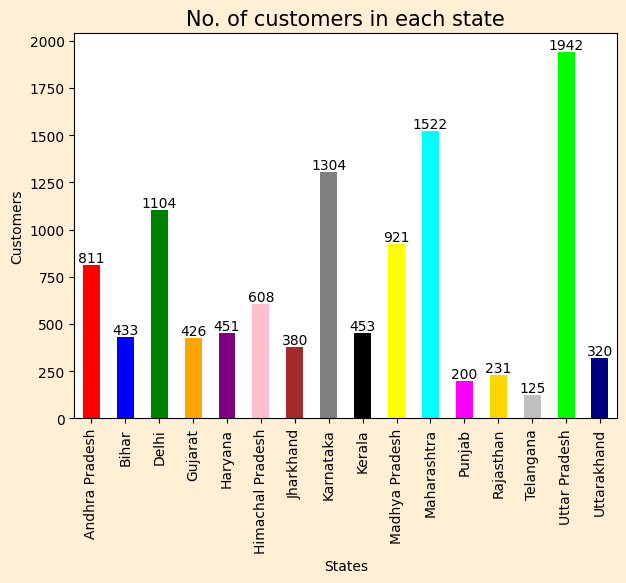

----------------------------------------------------------------------------


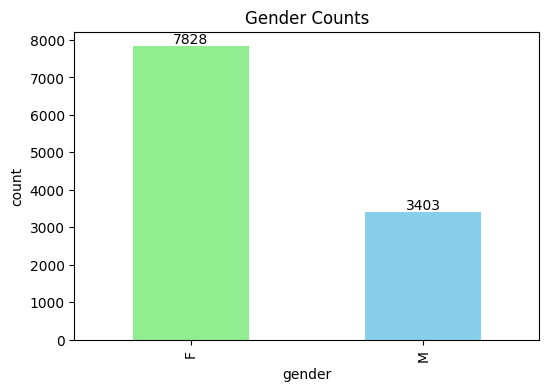

-----------------------------------------------------------------------


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diwalisalesdata.csv", encoding="unicode_escape")
first5 = df.head()
print(first5)
print()

print("========= DATA INFO =========")
print(df.info())
print("----------------------------------------------------------------")

print("========= MISSING VALUES =========")
print(df.isna().sum())
print("----------------------------------------------------------------")

print("========= DUPLICATE VALUES =========")
print(df.duplicated().sum())
print("----------------------------------------------------------------")

print("========= STATISTICAL SUMMARY =========")
print(df.describe())
print("----------------------------------------------------------------")

print("========= DATA TYPES =========")
print(df.dtypes)
print("----------------------------------------------------------------")


df = df.drop(['Status', 'unnamed1'], axis=1)    #removing null columns.


df=df.drop_duplicates()   #droping duplicates values.


'''converting following columns in nnumeric values'''
df['Amount'] = pd.to_numeric(df['Amount'],errors = 'coerce')
df['Age'] = pd.to_numeric(df['Age'],errors = 'coerce')
df['Orders'] = pd.to_numeric(df['Orders'],errors = 'coerce')


'''dropping missing values'''
df=df.dropna()

print("-----------------------------------------------------------------------")


df['Amount'] = df['Amount'].astype(int)   #changing datatype
df['Orders'] = df['Orders'].astype(int)
df['Age'] = df['Age'].astype(int)


'''List all unique product categories'''
unique_values = df['Product_Category'].unique()
print("========== Unique Product Category : ===========")
for i, values in enumerate(unique_values, start=1):
  print(f"{i}:{values}")
print("-----------------------------------------------------------------------")



'''Show total number of orders.'''
total_orders = df['Orders'].sum()
plt.figure(figsize=(3,3),facecolor='yellow')
plt.text(0.5, 0.4, f"Total Orders\n{total_orders}",
         ha='center', va='center', fontsize=20)
plt.box(False)
plt.xticks([])   # Remove ticks
plt.yticks([])
plt.show()
print("-----------------------------------------------------------------------")



'''Total number of users'''
total_users = df['User_ID'].count()
plt.figure(figsize=(3,3),facecolor='skyblue')
plt.text(0.5,0.4,f"Total Users\n{total_users}",
         ha='center',va='bottom',fontsize=20,color='black')
plt.box(False)
plt.xticks([])   # Remove ticks
plt.yticks([])
plt.show()
print("-----------------------------------------------------------------------")



'''State wise total customers'''
colors = ["red", "blue", "green", "orange", "purple", "pink", "brown",
          "gray", "black", "yellow", "cyan", "magenta", "gold", "silver",
          "lime", "navy", "teal", "maroon"]
fig, ax = plt.subplots(figsize=(5,5), facecolor='papayawhip')
total_cus_state = df.groupby('State')['User_ID'].count().plot(kind = 'bar',
                                                               color=colors,
                                                               figsize=(7,5),
                                                               ax = ax)
for c in total_cus_state.patches:
  total_cus_state.text(
      c.get_x() + c.get_width()/2,
      c.get_height(),
      str(int(c.get_height())),
      va = 'bottom',
      ha = 'center'
  )
plt.title("No. of customers in each state",fontsize=15)
plt.xlabel('States')
plt.ylabel('Customers')
plt.show()
print("----------------------------------------------------------------------------")



'''Gender counts'''
colors = ["lightgreen","skyblue"]
plt.figure(figsize=(6,4))
gender_counts = df['Gender'].value_counts().plot(kind = "bar",color=colors,
    title = "Gender Counts")

for g in gender_counts.patches:
  gender_counts.text(
      g.get_x() + g.get_width()/2,
      g.get_height(),
      str(int(g.get_height())),
      va = "bottom",
      ha = "center"
  )
plt.xlabel("gender")
plt.ylabel("count")
plt.show()
print("-----------------------------------------------------------------------")
